## Q5

In [152]:
import numpy as np
import sklearn.neural_network
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from torch import Tensor
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import BCELoss
from matplotlib import pyplot as plt

In [153]:
def repeat_array(data, n):
  rep_data = np.repeat(data, repeats = n/4, axis = 0)
  return rep_data

In [154]:
clean_data = np.array([np.array(x).astype(np.float64) for x in [[0, 0], [0, 1], [1, 0], [1, 1]]])
output_labels = np.array([0, 1, 1, 0])

In [155]:
def add_noise(data, n):
  mu, sigma = 0.0, 0.1
  #print(n/4)
  noise = np.random.normal(mu, sigma, size=(int(n/4), 2))
  #print("Noise: ", noise)
  for i in range(0, 4):
    for j in range(0, int(n/4)):
      data[i*int(n/4) + j][0] = data[i*int(n/4) + j][0] + noise[j][0]
      data[i*int(n/4) + j][1] = data[i*int(n/4) + j][1] + noise[j][1]
  return data

In [156]:
def get_loaders(data, labels, test_split_size):
  train_data = []
  test_data = []
  n = len(labels)
  if(test_split_size == 0.0 or test_split_size == 1.0):
    if(test_split_size == 0.0):
      x_train = data
      y_train = labels
      for i in range(0, len(x_train)):
        train_data.append(tuple([x_train[i], y_train[i]]))
      loaders = {
        'train': DataLoader(
          train_data, 
          batch_size=100, 
          shuffle=True, 
          num_workers=1
        )
      }
    if(test_split_size == 1.0):
      x_test = data
      y_test = labels
      for i in range(0, len(x_test)):
        test_data.append(tuple([x_test[i], y_test[i]]))  
      loaders = {
        'test': DataLoader(
          test_data,
          batch_size=int(n*test_split_size), 
          shuffle=True, 
          num_workers=1
        )
      }
  else:
    x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = test_split_size)
    for i in range(0, len(x_train)):
      train_data.append(tuple([x_train[i], y_train[i]]))
    for i in range(0, len(x_test)):
      test_data.append(tuple([x_test[i], y_test[i]]))
    loaders = {
      'train': DataLoader(
        train_data, 
        batch_size=100, 
        shuffle=True, 
        num_workers=1
      ),
      'test': DataLoader(
        test_data, 
        batch_size=int(n*test_split_size), 
        shuffle=True, 
        num_workers=1
      )
    }
  #print("x_train: ", x_train)
  #print("y_train: ", y_train)
  #print("x_test: ", x_test)
  #print("y_test: ", y_test)
  return loaders

In [157]:
class MLP(Module):
  # define model elements
  def __init__(self, n_inputs):
    super(MLP, self).__init__()
    # input to first hidden layer
    self.hidden1 = Linear(n_inputs, 10)
    #kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
    self.act1 = ReLU()
    # second hidden layer
    self.hidden2 = Linear(10, 8)
    #kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
    self.act2 = ReLU()
    # third hidden layer and output
    self.hidden3 = Linear(8, 1)
    #xavier_uniform_(self.hidden3.weight)
    self.act3 = Sigmoid()
 
  # forward propagate input
  def forward(self, X):
    # input to first hidden layer
    X = self.hidden1(X)
    X = self.act1(X)
      # second hidden layer
    X = self.hidden2(X)
    X = self.act2(X)
    # third hidden layer and output
    X = self.hidden3(X)
    X = self.act3(X)
    return X

def evaluate_model(loaders, model, loss_function):
  total_loss = 0.0
  for i, (inputs, targets) in enumerate(loaders['test']):
      # evaluate the model on the test set
      yhat = model(inputs.float())
      # round to class values
      loss = loss_function(yhat, targets.float().reshape((targets.shape[0],1)))
      total_loss += loss.item()
  return total_loss

def train_model(loaders, model, loss_function, optimizer, num_epochs):
  model.train()
  # define the optimization
  train_loss_array = []
  test_loss_array = []
  # enumerate epochs
  for epoch in range(num_epochs):
    total_loss = 0.0
    counter = 0
    # enumerate mini batches
    if('train' in loaders.keys()):
      for i, (inputs, targets) in enumerate(loaders['train']):
        # clear the gradients
        optimizer.zero_grad()
        # compute the model output
        yhat = model(inputs.float())
        # calculate loss
        loss = loss_function(yhat, targets.float().reshape((targets.shape[0],1)))
        # credit assignment
        loss.backward()
        # update model weights
        optimizer.step()
        #print("loss: ", loss.item())
        total_loss += loss.item()
        counter += 1
      train_loss_array.append(total_loss/counter)
    if('test' in loaders.keys()):
      test_loss_array.append(evaluate_model(loaders, model, loss_function))
  if('train' in loaders.keys()):
    #print(train_loss_array)
    plt.plot(list(range(len(train_loss_array))), train_loss_array, '-go')
    plt.title("train loss")
    plt.show()
  if('test' in loaders.keys()):
    #print(test_loss_array)
    plt.plot(list(range(len(test_loss_array))), test_loss_array, '-ro')
    plt.title("test loss")
    plt.show()

###(a)

test_data_size:train_data_size = 0:100


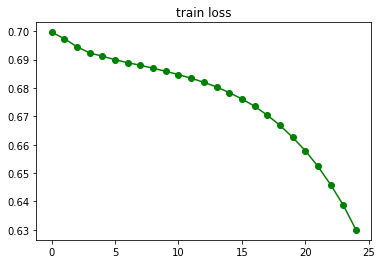

test_data_size:train_data_size = 20:80


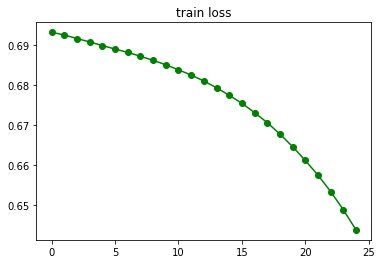

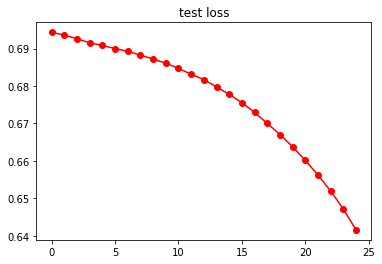

test_data_size:train_data_size = 40:60


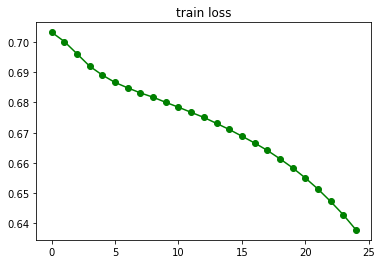

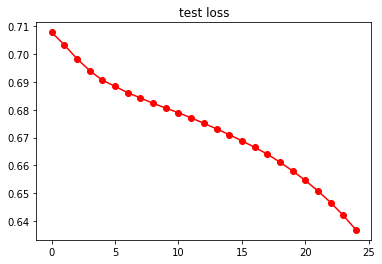

test_data_size:train_data_size = 60:40


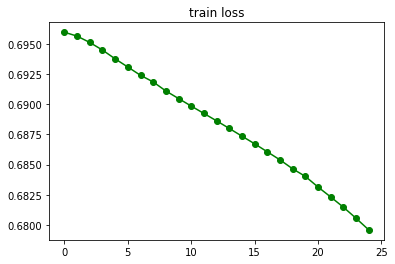

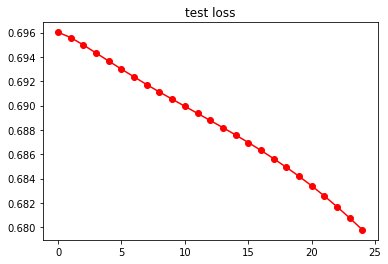

test_data_size:train_data_size = 80:20


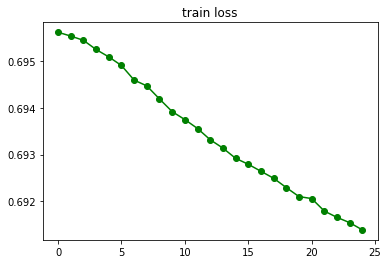

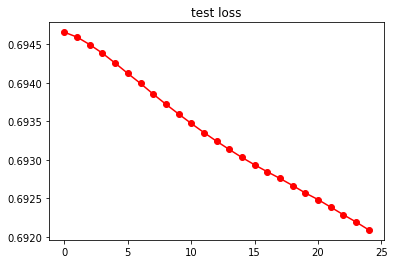

test_data_size:train_data_size = 100:0


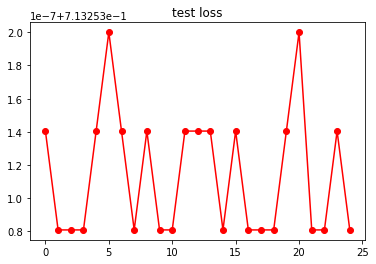

In [158]:
num_epochs = 25
n = 1000
rep_clean_data = repeat_array(clean_data, n)
rep_output_labels = repeat_array(output_labels, n)
noisy_data = add_noise(rep_clean_data, n)
for test_split_size in [0.0, 0.2, 0.4, 0.6, 0.8, 1]:
  loaders = get_loaders(noisy_data, rep_output_labels, test_split_size)
  loss_function = BCELoss()
  model = MLP(2)
  optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
  print("test_data_size:train_data_size = {}:{}".format(int(test_split_size*100), 100 - int(test_split_size*100)))
  train_model(loaders, model, loss_function, optimizer, num_epochs)

###(b)

test_data_size:train_data_size = 0:100


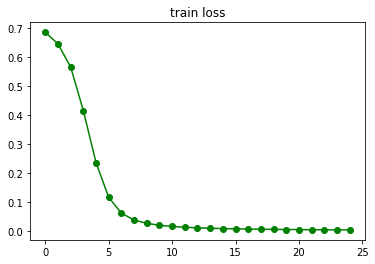

test_data_size:train_data_size = 20:80


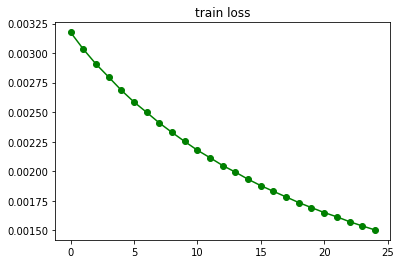

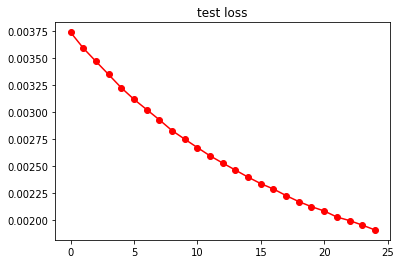

test_data_size:train_data_size = 40:60


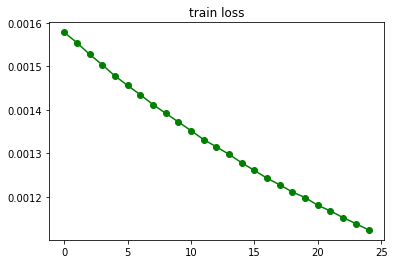

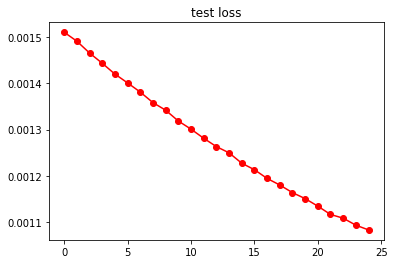

test_data_size:train_data_size = 60:40


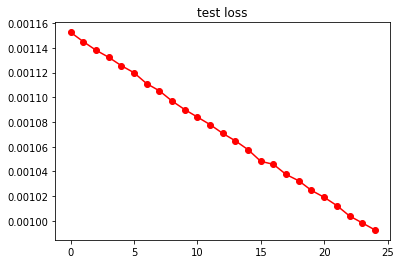

test_data_size:train_data_size = 80:20


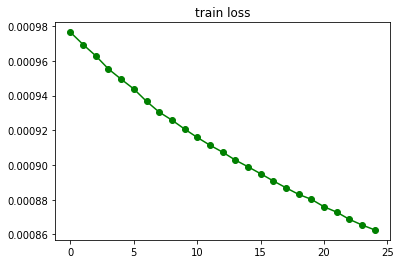

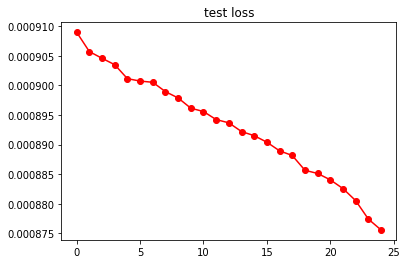

test_data_size:train_data_size = 100:0


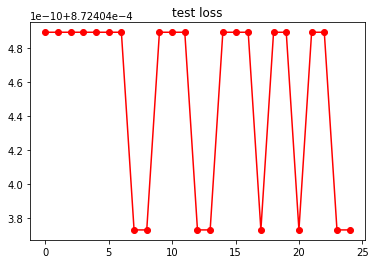

In [159]:
num_epochs = 25
n = 5000
rep_clean_data = repeat_array(clean_data, n)
rep_output_labels = repeat_array(output_labels, n)
noisy_data = add_noise(rep_clean_data, n)
loss_function = BCELoss()
model = MLP(2)
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
for test_split_size in [0.0, 0.2, 0.4, 0.6, 0.8, 1]:
  print("test_data_size:train_data_size = {}:{}".format(int(test_split_size*100), 100 - int(test_split_size*100)))
  train_model(get_loaders(noisy_data, rep_output_labels, test_split_size), model, loss_function, optimizer, num_epochs)

test_data_size:train_data_size = 0:100


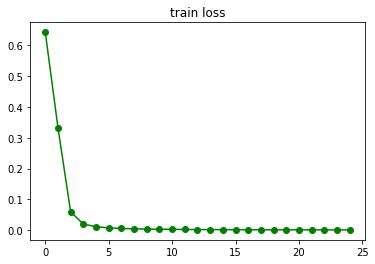

test_data_size:train_data_size = 20:80


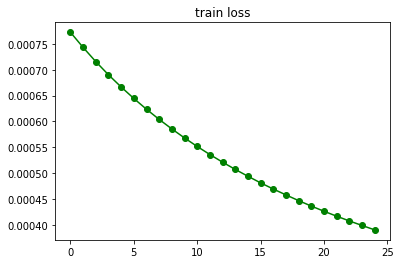

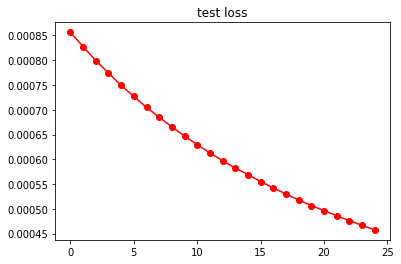

test_data_size:train_data_size = 40:60


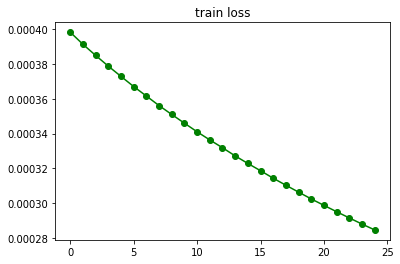

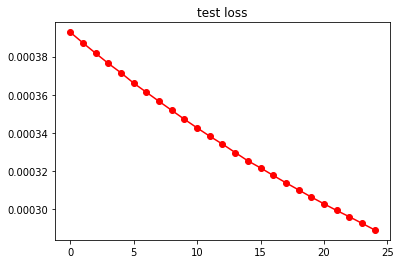

test_data_size:train_data_size = 60:40


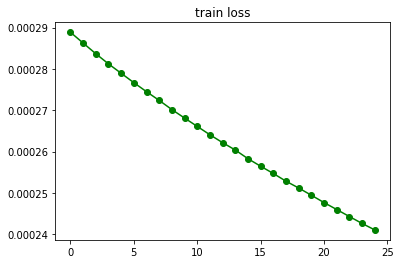

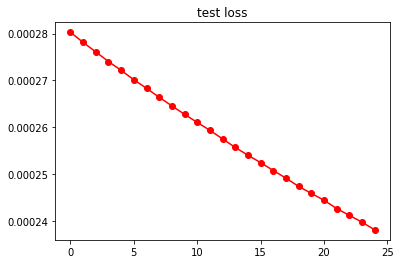

test_data_size:train_data_size = 80:20


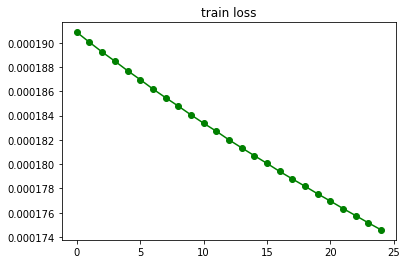

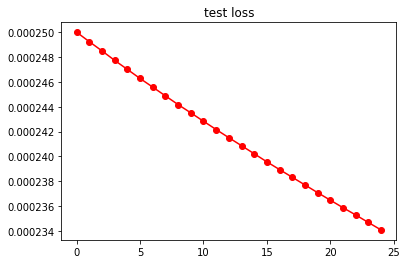

test_data_size:train_data_size = 100:0


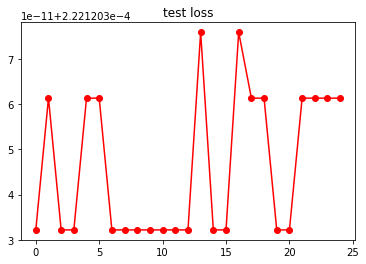

In [160]:
num_epochs = 25
n = 10000
rep_clean_data = repeat_array(clean_data, n)
rep_output_labels = repeat_array(output_labels, n)
noisy_data = add_noise(rep_clean_data, n)
loss_function = BCELoss()
model = MLP(2)
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
for test_split_size in [0.0, 0.2, 0.4, 0.6, 0.8, 1]:
  print("test_data_size:train_data_size = {}:{}".format(int(test_split_size*100), 100 - int(test_split_size*100)))
  train_model(get_loaders(noisy_data, rep_output_labels, test_split_size), model, loss_function, optimizer, num_epochs)

Following are the observations when number of epochs used is 25

If we compare the graphs for all possible values of N = {1000, 5000, 10000} for split ratio for train and test as 80:20, we see that the training error decreased from 0.64 by 0.6385 as sample size increases from 1000 to 5000 and decreases again by 0.0011 when sample size increases from 5000 to 10000. In similar format testing error for same split decreases from 0.64 by 0.638 when sample size increases from 1000 to 5000 and again decreases by 0.00155 when sample size increases from 5000 to 10000.

If we compare for errors for 40:60 train:test split, we see that training error decreased from 0.68 by 0.679175 as sample size increases from 1000 to 5000 and decreases again by 0.000585 when sample size increases from 5000 to 10000. In similar format testing error for same split decreases from 0.68 by 0.679 when sample size increases from 1000 to 5000 and again decreases by 0.00076 when sample size increases from 5000 to 10000.

While comparing train and test error with respect to split size increases for test split from 0 to 100, we see an increase in the training and testing error when sample size is 1000.

Yes, observations seems inline with the ERM theory that when the number of sample size increases the error has reduced to very smaller values which are nearly 0 which means the difference between expected and emperical risk crossing any value epsilon will also be 0.